<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df = pd.read_csv("/Users/seanb/1programming/lambda/ds-unit-4/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv", index_col=0)




    # print(df['clean'])

In [3]:
#cleaner for loop
df['clean'] = pd.Series()
for row in range(0, len(df)):
    soup = BeautifulSoup(df['description'][row], 'html.parser')
    
    df['clean'][row] = soup.get_text()
    df['clean'] = df['clean'].str.replace(r'\\n', '', regex=True)
    df['clean'] = df['clean'].str.replace(r'\\xe2\\x80\\x93', '', regex=True)
    df['clean'] = df['clean'].str.replace(r'\\xe2\\x80\\x99s', '', regex=True)

C:\Users\seanb\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\seanb\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\seanb\anaconda3\envs\U4-S1-NLP\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
df['clean']

0      b"Job Requirements:Conceptual understanding in...
1      b'Job DescriptionAs a Data Scientist 1, you wi...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA  multiple locations2+ years of...
                             ...                        
421    b"About Us:Want to be part of a fantastic and ...
422    b'InternshipAt Uber, we ignite opportunity by ...
423    b'$200,000 - $350,000 a yearA million people a...
424    b"SENIOR DATA SCIENTISTJOB DESCRIPTIONABOUT US...
425    b'Cerner Intelligence is a new, innovative org...
Name: clean, Length: 426, dtype: object

## 2) Use Spacy to tokenize the listings 

In [5]:
##### Your Code Here #####
# Classics
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


nlp = spacy.load("en_core_web_lg")



In [6]:
df['tokens'] = pd.Series()

for i in range(0, len(df)):
    doc = nlp(df['clean'][i])

    df['tokens'][i] = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]



C:\Users\seanb\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
C:\Users\seanb\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\seanb\anaconda3\envs\U4-S1-NLP\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [7]:
for i in range(0, len(df)):
    df['tokens'][i] = " ".join(df['tokens'][i])

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [8]:

text = df['tokens']

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())


In [9]:
highest_word_count = dtm.max().sort_values(ascending=False).head(15)

In [10]:
highest_word_count


americas    48
states      48
united      48
datum       38
ericsson    26
team        25
data        24
xe2         21
x80         21
level       20
ability     20
x83         19
you         19
science     19
xef         19
dtype: int64

## 4) Visualize the most common word counts

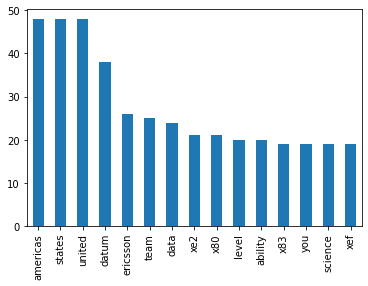

In [11]:
ax = highest_word_count.plot.bar()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [12]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [13]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['tokens']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,directorate,happen,minority,single,$,"$ 100,000",$ 300,+,+ city,...,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,youyou,yrs,|,||
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.024030,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.181584,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.204236,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.140865,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [14]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [15]:
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 1.26224596, 1.27289593, 1.27522681, 1.27522681]]),
 array([[256, 201, 410,  23, 123]], dtype=int64))

In [16]:
# Query for Sim of Random datascience
rndm_tech_article = ["work on spacecraft that will leave earth and be in orbit."]
new = tfidf.transform(rndm_tech_article)
nn.kneighbors(new.todense())


(array([[1.33202027, 1.34836553, 1.36542475, 1.37214977, 1.37214977]]),
 array([[244, 306, 379, 317,  74]], dtype=int64))

In [17]:
df['clean'][240]

'b"Minimum qualifications:Master\'s degree in Operations Research, Industrial Engineering, Statistics, related field, or equivalent practical experience.2 years of relevant work experience (e.g., as a data scientist) or equivalent. Analytical engagements outside class work while at school can be included.Experience with statistical software (e.g., R, Python) and database languages (e.g., SQL)Preferred qualifications:PhD in Operations Research, Industrial Engineering, Statistics or related field.4 years of relevant work experience (e.g., as a data scientist), including experience applying advanced analytics to planning and infrastructure problems.Experience designing and building statistical forecasting models.Experience designing and building machine learning models.Excellent problem-framing, problem-solving and project management skills.Excellent customer service and team collaboration skills.About the jobAt Google, data drives all of our decision-making. Data Scientists work all acro

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 